  User ID  Fan Challenges Completed  Predictive Accuracy (%)  \
0    U001                         5                       80   
1    U002                         8                       60   
2    U003                         3                       90   
3    U004                         7                       70   
4    U005                         2                       50   

   Virtual Merchandise Purchases  Sponsorship Interactions (Ad Clicks)  \
0                              3                                    10   
1                              1                                     8   
2                              0                                     6   
3                              2                                    15   
4                              5                                     3   

   Time on Live 360 (mins)  Real-Time Chat Activity (Messages Sent)  
0                      120                                       20  
1                      100    

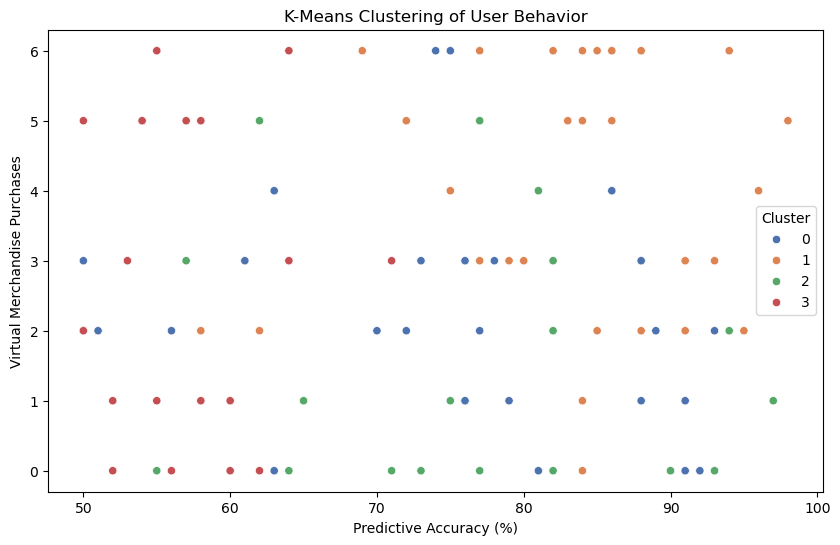

/Users/usanyetsakma/Desktop/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Accuracy: 0.15


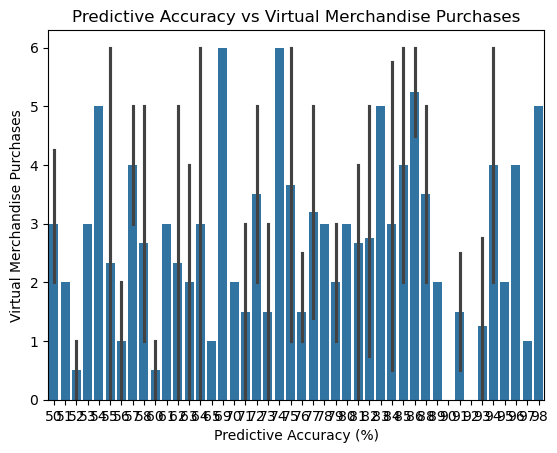

Cluster Counts:
Cluster
1    31
0    28
2    22
3    19
Name: count, dtype: int64

Cluster 0 Characteristics:
       Fan Challenges Completed  Predictive Accuracy (%)  \
count                 28.000000                28.000000   
mean                   3.678571                75.785714   
std                    2.037674                13.587459   
min                    1.000000                50.000000   
25%                    2.000000                68.250000   
50%                    3.500000                76.500000   
75%                    5.000000                88.000000   
max                    9.000000                93.000000   

       Virtual Merchandise Purchases  Sponsorship Interactions (Ad Clicks)  \
count                      28.000000                             28.000000   
mean                        2.285714                             14.535714   
std                         1.760832                              3.543195   
min                         0.000000 

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the data
data = pd.read_csv('/Users/usanyetsakma/Downloads/VCX.csv')

# Preview the data
#print(data.head())

# Cleaning the data (handle missing values, if any)
data.dropna(inplace=True)

# Excluding non-numeric columns like 'User ID', this will only select numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Standardizing the data for clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Clustering with K-Means
kmeans = KMeans(n_clusters=4, random_state=42)  # I chose 4 clusters
clusters = kmeans.fit_predict(scaled_data)

# Adding the cluster information to the original data
data['Cluster'] = clusters

# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Predictive Accuracy (%)', y='Virtual Merchandise Purchases', hue='Cluster', palette='deep')
plt.title("K-Means Clustering of User Behavior")
plt.show()

# Predictive modeling: Example - Logistic Regression to predict merchandise purchases
X = data[['Fan Challenges Completed', 'Predictive Accuracy (%)', 'Sponsorship Interactions (Ad Clicks)', 'Time on Live 360 (mins)', 'Real-Time Chat Activity (Messages Sent)']]
y = data['Virtual Merchandise Purchases']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the model
model = LogisticRegression(max_iter=1000)

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Create visualizations
sns.barplot(x='Predictive Accuracy (%)', y='Virtual Merchandise Purchases', data=data)
plt.title("Predictive Accuracy vs Virtual Merchandise Purchases")
plt.show()

# Insights
print("Cluster Counts:")
print(data['Cluster'].value_counts())

# Analyzing cluster characteristics
for i in range(4):
    print(f"\nCluster {i} Characteristics:")
    print(data[data['Cluster'] == i].describe())
